In [ ]:
!pip install opencv-contrib-python

In [ ]:
!pip install deepface

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
from deepface import DeepFace
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, 
array_to_img, img_to_array, load_img
from tensorflow import keras
from tensorflow.keras import layers


In [3]:
from deepface import DeepFace

In [4]:
img=cv2.imread("download.jpeg")


In [5]:
import matplotlib.pyplot as plt

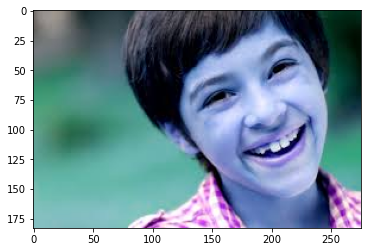

In [6]:
plt.imshow(img)

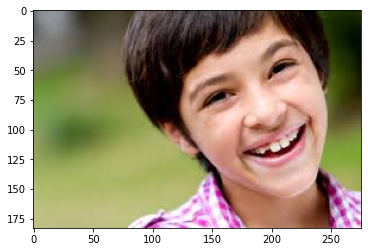

In [7]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
predictions=DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]   


In [9]:
predictions

{'region': {'x': 120, 'y': 3, 'w': 129, 'h': 152},
 'emotion': {'angry': 1.430184636851263e-17,
  'disgust': 1.1524299346523849e-32,
  'fear': 3.098396666558662e-20,
  'happy': 99.99908804888058,
  'sad': 1.1853765236581594e-15,
  'surprise': 9.135410854681098e-10,
  'neutral': 0.0009127784867995169},
 'dominant_emotion': 'happy',
 'age': 24,
 'gender': 'Man',
 'race': {'asian': 0.40956728738947434,
  'indian': 0.5402008393526577,
  'black': 0.02206868070633669,
  'white': 63.35368534050497,
  'middle eastern': 13.875147037216845,
  'latino hispanic': 21.799334692915362},
 'dominant_race': 'white'}

In [10]:
predictions['dominant_emotion']

'happy'

In [11]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [12]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h)in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

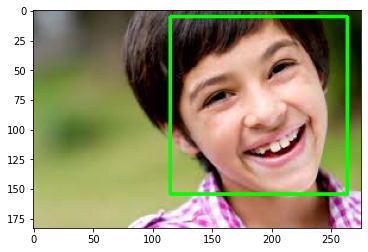

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
font= cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,predictions['dominant_emotion'],(0,50),font,1,(0,0,255),2,cv2.LINE_4)

array([[[112, 107, 104],
        [117, 112, 109],
        [124, 119, 116],
        ...,
        [  1,  46,  29],
        [  2,  47,  30],
        [  2,  47,  30]],

       [[112, 107, 104],
        [116, 111, 108],
        [124, 119, 116],
        ...,
        [  1,  46,  29],
        [  1,  46,  29],
        [  1,  46,  29]],

       [[112, 107, 104],
        [116, 111, 108],
        [123, 118, 115],
        ...,
        [  1,  45,  28],
        [  1,  45,  28],
        [  1,  45,  28]],

       ...,

       [[132, 191, 193],
        [132, 191, 193],
        [132, 191, 193],
        ...,
        [237, 171, 253],
        [223, 157, 238],
        [224, 158, 239]],

       [[132, 191, 193],
        [132, 191, 193],
        [132, 191, 193],
        ...,
        [255, 220, 255],
        [251, 204, 253],
        [232, 186, 233]],

       [[134, 191, 193],
        [134, 191, 193],
        [134, 191, 193],
        ...,
        [255, 244, 255],
        [255, 238, 255],
        [253, 225, 248]]

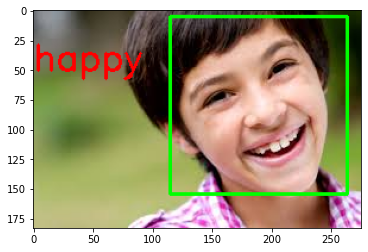

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
import cv2
from deepface import DeepFace
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDEError("cannnot open webcam!")


cv2.namedWindow("Window")
    
    
while True:
    ret,frame=cap.read()
    result=DeepFace.analyze(frame,actions=['emotion'])
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for(x,y,w,h)in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,result['dominant_emotion'],(0,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow("Original video",frame)
    
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
video_capture.release()
cv2.destroyAllWindows()  